<a href="https://colab.research.google.com/github/antoniskalantonis58-tech/f1-predictive/blob/main/01_data_import_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bloc 1 — Imports
import pandas as pd
import numpy as np


# Bloc 2 — Chargement des CSV


races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
drivers = pd.read_csv("drivers.csv")
constructors = pd.read_csv("constructors.csv")
circuits = pd.read_csv("circuits.csv")

races.head()
results.head()






,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
# Bloc 3 — Inspection rapide des tables


races.info()
results.info()
drivers.info()
constructors.info()
circuits.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB
<class 'pandas.core.

In [ ]:
# Bloc 4 — Suppression des colonnes inutiles avant fusion
results["raceId"].is_unique, races["raceId"].is_unique
drivers["driverId"].is_unique, constructors["constructorId"].is_unique, circuits["circuitId"].is_unique


(True, True, True)

In [ ]:
# On enlève les colonnes 'url' qui ne servent pas
races = races.drop(columns=["url"])
circuits = circuits.drop(columns=["url"])


In [ ]:
# Bloc 5 — Fusion des tables principales

df = (
    results.merge(races, on="raceId", how="inner")
           .merge(drivers, on="driverId", how="inner")
           .merge(constructors, on="constructorId", how="inner")
           .merge(circuits, on="circuitId", how="inner")
)

df.shape
df.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,name_y,nationality_y,url_y,circuitRef,name,location,country,lat,lng,alt
0,1,18,1,1,22,1,1,1,1,10.0,...,McLaren,British,http://en.wikipedia.org/wiki/McLaren,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
1,2,18,2,2,3,5,2,2,2,8.0,...,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
2,3,18,3,3,7,7,3,3,3,6.0,...,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
3,4,18,4,4,5,11,4,4,4,5.0,...,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
4,5,18,5,1,23,3,5,5,5,4.0,...,McLaren,British,http://en.wikipedia.org/wiki/McLaren,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10


In [ ]:
df.shape


(26759, 53)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number_x         26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time_x           26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [ ]:
# Bloc 6 — Restriction aux années 2000 et plus

df = df[df["year"] >= 2000]
df.shape


(10079, 53)

In [ ]:
# Bloc 7 — Sélection des colonnes nécessaires

cols = [
    "raceId",
    "year",
    "round",
    "grid",
    "positionOrder",
    "driverId",
    "constructorId",
    "circuitId"
]

df = df[cols]
df.head()


,raceId,year,round,grid,positionOrder,driverId,constructorId,circuitId
0,18,2008,1,1,1,1,1,1
1,18,2008,1,5,2,2,2,1
2,18,2008,1,7,3,3,3,1
3,18,2008,1,11,4,4,4,1
4,18,2008,1,3,5,5,1,1


In [ ]:
# Bloc 8 — Nettoyage des valeurs manquantes et anormales

import numpy as np
import pandas as pd  # au cas où

# grid = 0 -> considéré comme manquant
df["grid"] = df["grid"].replace(0, np.nan)

# s'assurer que positionOrder est numérique
df["positionOrder"] = pd.to_numeric(df["positionOrder"], errors="coerce")

# on enlève les lignes sans grid ou positionOrder
df = df.dropna(subset=["grid", "positionOrder"])

# on remet en entiers
df["grid"] = df["grid"].astype(int)
df["positionOrder"] = df["positionOrder"].astype(int)

df.isna().sum(), df.shape


(raceId           0
 year             0
 round            0
 grid             0
 positionOrder    0
 driverId         0
 constructorId    0
 circuitId        0
 top10            0
 dtype: int64,
 (9986, 9))

In [ ]:

df["top10"] = (df["positionOrder"] <= 10).astype(int)


In [ ]:
# Bloc 10 — Sauvegarde du dataset nettoyé

df.to_csv("clean_f1_2000_2020.csv", index=False)


In [ ]:
#BLOC A — Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [ ]:
#BLOC B — Chargement du dataset nettoyé

df = pd.read_csv("clean_f1_2000_2020.csv")
df.head()


,raceId,year,round,grid,positionOrder,driverId,constructorId,circuitId
0,18,2008,1,1,1,1,1,1
1,18,2008,1,5,2,2,2,1
2,18,2008,1,7,3,3,3,1
3,18,2008,1,11,4,4,4,1
4,18,2008,1,3,5,5,1,1


In [ ]:
#BLOC C — Création de la cible top10

df["top10"] = (df["positionOrder"] <= 10).astype(int)
df["top10"].value_counts()


,count
top10,
0,5210
1,4776


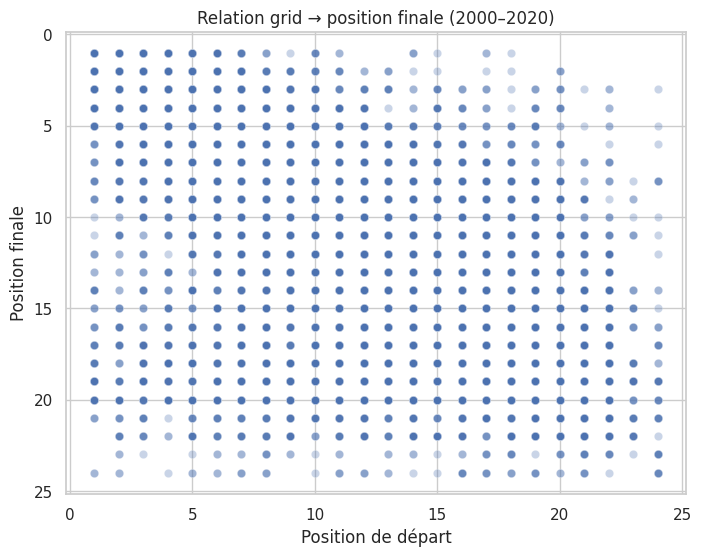

In [ ]:
#BLOC D — EDA : Grid vs Position finale

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="grid", y="positionOrder", alpha=0.3)
plt.gca().invert_yaxis()
plt.xlabel("Position de départ")
plt.ylabel("Position finale")
plt.title("Relation grid → position finale (2000–2020)")
plt.show()


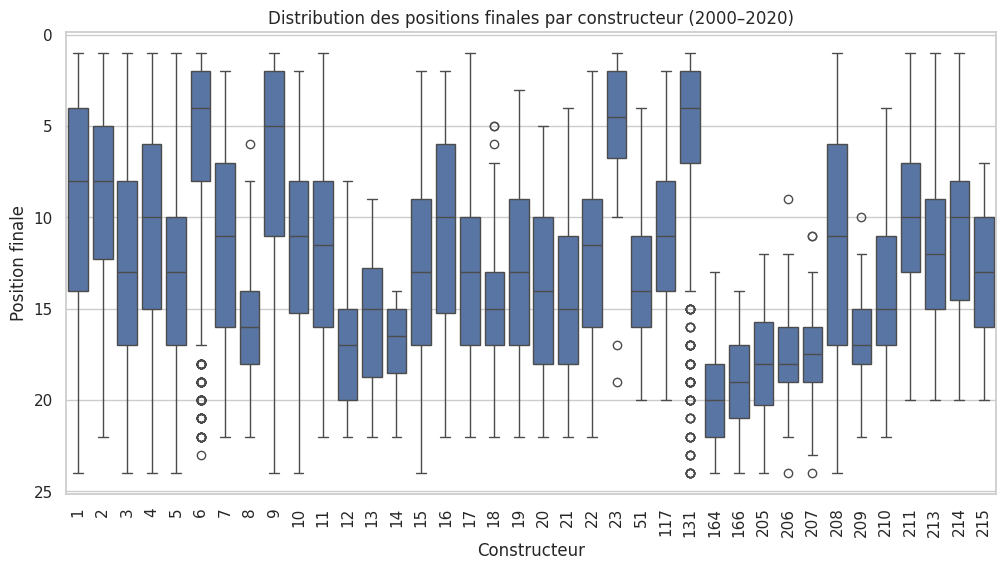

In [ ]:
#Bloc E — EDA : Performance par constructeur

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="constructorId", y="positionOrder")
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.xlabel("Constructeur")
plt.ylabel("Position finale")
plt.title("Distribution des positions finales par constructeur (2000–2020)")
plt.show()


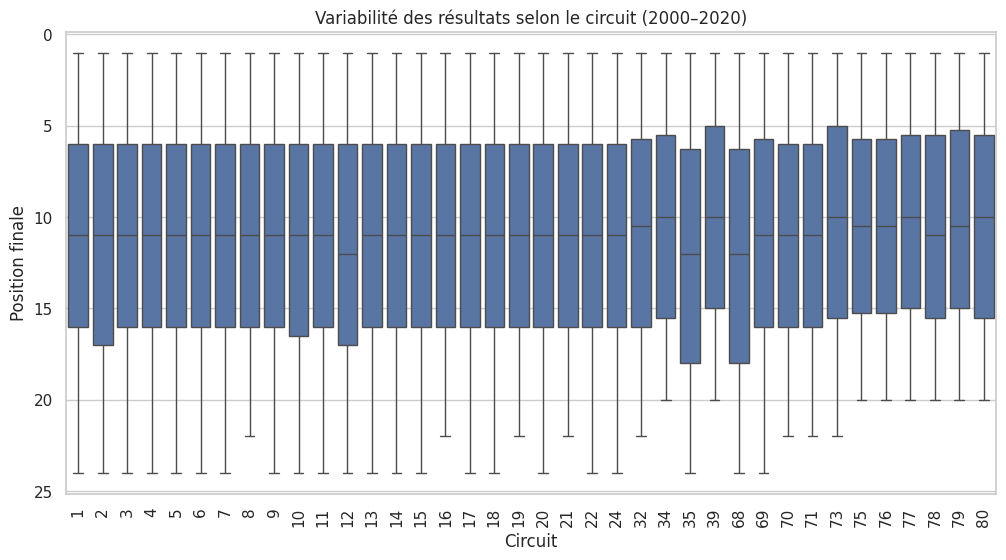

In [ ]:
#Bloc F — EDA : Variabilité des circuits

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="circuitId", y="positionOrder")
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.xlabel("Circuit")
plt.ylabel("Position finale")
plt.title("Variabilité des résultats selon le circuit (2000–2020)")
plt.show()


In [ ]:
#Bloc G — Baseline naïve (grid ≤ 10 → top10)

from sklearn.metrics import accuracy_score, log_loss, brier_score_loss

# Baseline : un pilote partant dans le top 10 est prédit comme finissant dans le top 10
baseline_pred = (df["grid"] <= 10).astype(int)

baseline_acc = accuracy_score(df["top10"], baseline_pred)
baseline_brier = brier_score_loss(df["top10"], baseline_pred)
baseline_logloss = log_loss(df["top10"], baseline_pred)

baseline_acc, baseline_brier, baseline_logloss


(0.747446424994993, np.float64(0.252553575005007), 9.102953519662872)

In [ ]:
#Bloc H — Train/test split

from sklearn.model_selection import train_test_split

X = df[["grid", "constructorId", "circuitId", "year"]]
y = df["top10"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#Bloc I — Modèle 1 : Régression logistique

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

pred_log = log_reg.predict(X_test)
pred_log_proba = log_reg.predict_proba(X_test)[:, 1]

log_acc = accuracy_score(y_test, pred_log)
log_brier = brier_score_loss(y_test, pred_log_proba)
log_logloss = log_loss(y_test, pred_log_proba)

log_acc, log_brier, log_logloss


(0.7367367367367368, np.float64(0.18263155107332313), 0.5468048957620971)

In [ ]:
#Bloc J — Modèle 2 : Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
pred_rf_proba = rf.predict_proba(X_test)[:, 1]

rf_acc = accuracy_score(y_test, pred_rf)
rf_brier = brier_score_loss(y_test, pred_rf_proba)
rf_logloss = log_loss(y_test, pred_rf_proba)

rf_acc, rf_brier, rf_logloss


(0.7142142142142142, np.float64(0.19114076659761614), 0.6105977328466905)

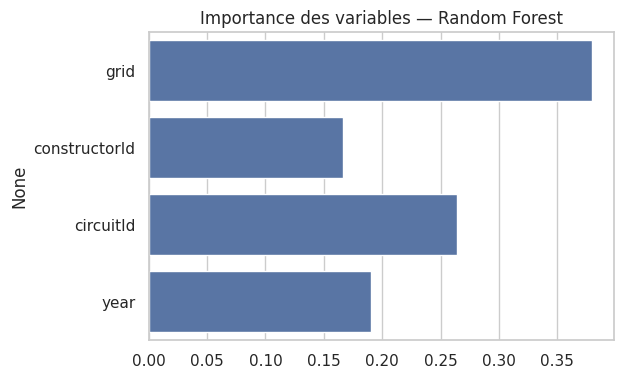

In [ ]:
#Bloc K — Importance des variables du Random Forest

importances = rf.feature_importances_

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=X.columns)
plt.title("Importance des variables — Random Forest")
plt.show()


In [ ]:
#Bloc L — Tableau comparatif des modèles

results_models = pd.DataFrame({
    "Model": ["Baseline", "Logistic Regression", "Random Forest"],
    "Accuracy": [baseline_acc, log_acc, rf_acc],
    "Brier Score": [baseline_brier, log_brier, rf_brier],
    "Log Loss": [baseline_logloss, log_logloss, rf_logloss]
})

results_models


,Model,Accuracy,Brier Score,Log Loss
0,Baseline,0.747446,0.252554,9.102954
1,Logistic Regression,0.736737,0.182632,0.546805
2,Random Forest,0.714214,0.191141,0.610598


from matplotlib import pyplot as plt
results_models['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_models['Brier Score'].plot(kind='hist', bins=20, title='Brier Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_models['Log Loss'].plot(kind='hist', bins=20, title='Log Loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_models.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_models.plot(kind='scatter', x='Accuracy', y='Brier Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_models.plot(kind='scatter', x='Brier Score', y='Log Loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_models['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_models['Brier Score'].plot(kind='line', figsize=(8, 4), title='Brier Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_models['Log Loss'].plot(kind='line', figsize=(8, 4), title='Log Loss')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_models['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_models, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_models['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_models, x='Brier Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_models['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_models, x='Log Loss', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)